In [2]:
import numpy as np
from numpy import diag
from numpy.linalg import solve
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
L = 1.0
n = 200
dx = L /(n-1)
x = np.linspace(0,L,n)

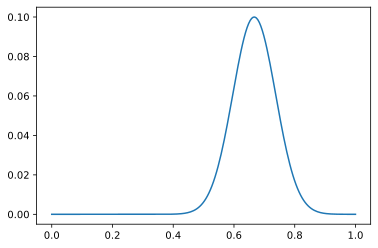

In [4]:
def source(x):
    σ = 0.1
    x0 = 2.0/3.0
    return 0.1*np.exp(-(x-x0)**2/σ/σ)

plt.plot(x,source(x))

In [8]:
TL = 300
TR = 350
k = 1e-5

d = -2.0*np.ones(n)
d[0] = 1.0
d[-1] = 1.0

l = np.ones(n-1)
l[-1] = 0.0

u = np.ones(n-1)
u[0] = 0.0

A = diag(l,-1) + diag(d,0) + diag(u,1)
print(A)

# build the RHS
b = - dx*dx*source(x)/k
b[0] = TL
b[-1] = TR
print(b)

# solve using build in solver.
# method 1: use the solve routine
T = solve(A,b)


[[ 1.  0.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]]
[ 3.00000000e+02 -2.45586662e-20 -4.76320558e-20 -9.19179916e-20
 -1.76485234e-19 -3.37149774e-19 -6.40831748e-19 -1.21191403e-18
 -2.28037494e-18 -4.26920837e-18 -7.95234283e-18 -1.47383710e-17
 -2.71775639e-17 -4.98629782e-17 -9.10232949e-17 -1.65323099e-16
 -2.98759122e-16 -5.37174588e-16 -9.60984521e-16 -1.71050353e-15
 -3.02927155e-15 -5.33776054e-15 -9.35807703e-15 -1.63237823e-14
 -2.83309815e-14 -4.89225512e-14 -8.40549359e-14 -1.43689156e-13
 -2.44394494e-13 -4.13585676e-13 -6.96379871e-13 -1.16663118e-12
 -1.94458798e-12 -3.22498920e-12 -5.32151855e-12 -8.73674269e-12
 -1.42715177e-11 -2.31951626e-11 -3.75086414e-11 -6.03492524e-11
 -9.66093375e-11 -1.53876735e-10 -2.43856014e-10 -3.84503791e-10
 -6.03218193e-10 -9.41574928e-10 -1.46231855e-09 -2.25962172e-09
 -3.47405061e-09 -5.31426481

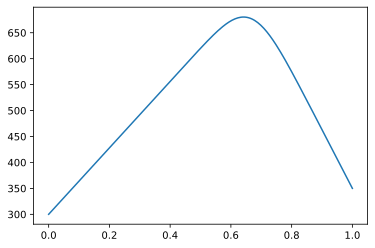

In [5]:
plt.plot(x,T)

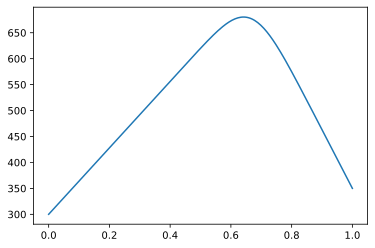

In [6]:
Ainv = np.linalg.inv(A)
T_method2 = Ainv@b
plt.plot(x,T_method2)

In [7]:
# l = lower diagonal
# d = diagonal
# u = upper diagonal
# b = right hand side vector
def thomas(ml,md,mu,mb):
    l = ml.copy()
    d = md.copy()
    u = mu.copy()
    b = mb.copy()
    n = len(d)
    x = np.zeros(n)
    for i in range(1,n):
        d[i] = d[i] - u[i-1]*l[i-1]/d[i-1]
        b[i] = b[i] - b[i-1]*l[i-1]/d[i-1]
    x[n-1] = b[n-1]/d[n-1]
    for i in range(n-2,-1,-1):
        x[i] = (b[i]-u[i]*x[i+1])/d[i]
    return x

In [9]:
T_thomas = thomas(l,d,u,b)
plt.plot(x,T_thomas,'o', x, T_method2)
plt.grid()

NameError: name 'thomas' is not defined